In [461]:
# Written by Ebuka Modified by Justin Scott 
import numpy as np # We need to import the Numpy library as it's optimized to numerical operations
import pandas as pd # The pandas dataframe is a python data structure that helps construct rows and columns for data sets
import matplotlib.pyplot as plt # This library is responsible for creating the necessary plots and graphs
import tensorflow # This is a python framework with which different models can be easily implemented

In [462]:
data = pd.read_csv('coin_Bitcoin.csv') # Here we are simply using pandas to import the csv file containing the BTC data

In [463]:
data.head() # Taking a quick look at the first 5 rows of the data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [464]:
# Here we specify the columns we need and set the date as index
required_data = data[['Date','High','Low','Open','Close']]
required_data.set_index("Date",drop=True,inplace=True)
required_data.head()

,High,Low,Open,Close
Date,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000


In [465]:
required_data.Close.pct_change().head()

Date
2013-04-29 23:59:59         NaN
2013-04-30 23:59:59   -0.038328
2013-05-01 23:59:59   -0.158345
2013-05-02 23:59:59   -0.100692
2013-05-03 23:59:59   -0.070906
Name: Close, dtype: float64

In [466]:
# The log returns is optimized for stationarity and so we create an extra column for it
required_data['% Returns'] = required_data.Close.pct_change() # we find the percentage change using the pct_change() method
required_data['Log returns'] = np.log(1 + required_data['% Returns']) # from the percentage returns we can easily compute log returns
required_data.head()

C:\Users\Jstma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jstma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,High,Low,Open,Close,% Returns,Log returns
Date,,,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,NaN,NaN
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,-0.038328,-0.039082
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,-0.158345,-0.172385
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,-0.100692,-0.106130
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,-0.070906,-0.073545


In [467]:
required_data.dropna(inplace=True) # We drop all null/NaN values so that we do not get a value error


C:\Users\Jstma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


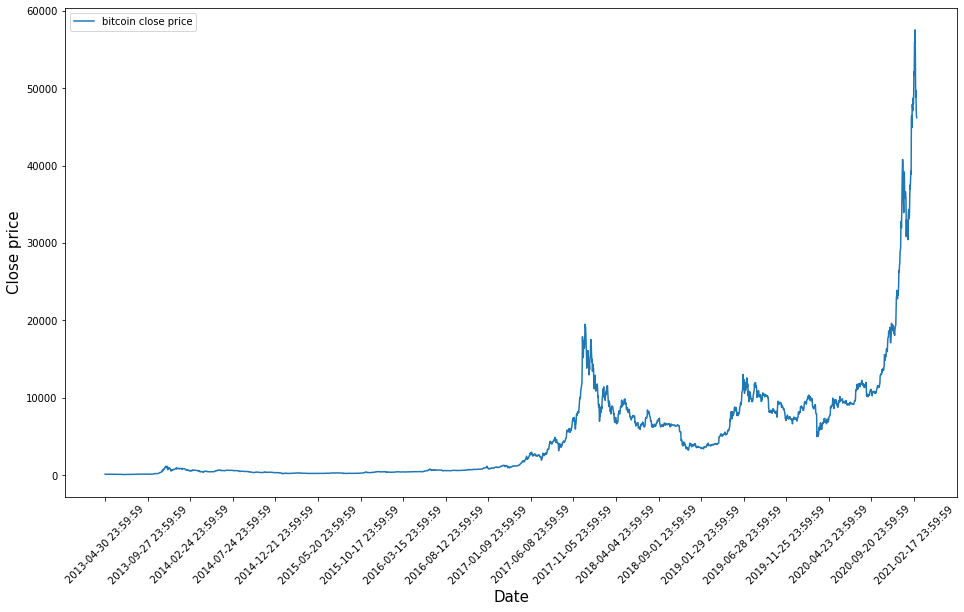

In [468]:
# We make a plot of the closing price over the given timeframe to have a peek at the price behaviour prior to modeling 
plt.figure(figsize=(16,9))
plt.plot(range(required_data.shape[0]),required_data['Close'],label='bitcoin close price')
plt.xticks(range(0,required_data.shape[0],150),required_data.index[::150],rotation=45)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close price',fontsize=15)
plt.legend(loc='best')
plt.show()

In [469]:
# For the training inputs, we will utilize two parameters, the closing price and the log returns
x = required_data[['Close','Log returns']].values
x

array([[ 1.39000000e+02, -3.90823063e-02],
       [ 1.16989998e+02, -1.72385490e-01],
       [ 1.05209999e+02, -1.06130099e-01],
       ...,
       [ 4.70938530e+04, -5.39697542e-02],
       [ 4.63397601e+04, -1.61421417e-02],
       [ 4.61884513e+04, -3.27054722e-03]])

In [470]:
# The log returns is a stationary parameter and we can observe its mean reversion from the plot 
# This takes a long while to plot
# plt.figure(figsize=(12,7))
# plt.plot(required_data['Log returns'])

In [471]:
x = required_data[['Close','Log returns']].values

In [472]:
# Normalization: This helps to scale the data so that it lies within the range 0 to 1, this helps especially
#                 when the data has a high standard deviation

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [473]:
scaler = MinMaxScaler(feature_range=(0,1)).fit(x) # we pass the relevant data to the MinMax scaler
x_scaled = scaler.transform(x)
x_scaled[0:5]

array([[1.22789530e-03, 5.17705755e-01],
       [8.44922917e-04, 3.55572157e-01],
       [6.39951823e-04, 4.36157067e-01],
       [5.10148400e-04, 4.75789397e-01],
       [7.66797291e-04, 7.36176265e-01]])

In [474]:
y = [x[0] for x in x_scaled] # For the training outputs, we specify only the closing price as that is what we want to predict, right?
y[:5]

[0.0012278952992176289,
 0.0008449229166509456,
 0.0006399518234535607,
 0.0005101484001897834,
 0.0007667972913573161]

In [475]:
split_point = int(len(x_scaled)*0.8) # Using 80% of the data as training set, we mark out a split point at the 80% mark
print(split_point)

2288


In [476]:
# Creating the training and testing sequence
x_train = x_scaled[:split_point]
x_test = x_scaled[split_point:]
y_train = y[:split_point]
y_test = y[split_point:]

In [477]:
# Here we are simply verifying that the datasets have the right dimensions
assert len(x_train) == len(y_train)
assert len(x_test) == len(y_test)

In [478]:
x_train

array([[0.0012279 , 0.51770576],
       [0.00084492, 0.35557216],
       [0.00063995, 0.43615707],
       ...,
       [0.18182475, 0.57902189],
       [0.18710653, 0.59984514],
       [0.18968969, 0.58181273]])

Labeling the model

In [479]:
time_step = 100 # the time step for the LSTM model
xtrain = []
ytrain = []
xtest = []
ytest = []

for i in range(time_step,len(x_train)):
  xtrain.append(x_train[i-time_step:i,:x_train.shape[1]]) # we want to use the last 3 days' data to predict the next day
  ytrain.append(y_train[i])
for i in range(time_step, len(y_test)):
  xtest.append(x_test[i-time_step:i,:x_test.shape[1]])
  ytest.append(y_test[i])

In [480]:
print(xtrain[0])
print(ytrain[0])
print(x_train[:5])

[[1.22789530e-03 5.17705755e-01]
 [8.44922917e-04 3.55572157e-01]
 [6.39951823e-04 4.36157067e-01]
 [5.10148400e-04 4.75789397e-01]
 [7.66797291e-04 7.36176265e-01]
 [8.26131099e-04 6.01559717e-01]
 [7.63317359e-04 5.26757454e-01]
 [7.49397367e-04 5.56545139e-01]
 [7.85345644e-04 5.87571015e-01]
 [7.69755247e-04 5.55606528e-01]
 [8.48576885e-04 6.13184694e-01]
 [8.14525219e-04 5.44759849e-01]
 [8.10297103e-04 5.62673371e-01]
 [8.62148938e-04 5.96356703e-01]
 [7.49397367e-04 4.96532501e-01]
 [7.96725183e-04 5.94555171e-01]
 [8.75720858e-04 6.12649008e-01]
 [9.49757490e-04 6.08055595e-01]
 [9.58161684e-04 5.70006862e-01]
 [9.31922541e-04 5.50297591e-01]
 [9.32096577e-04 5.65340386e-01]
 [9.47408463e-04 5.73982295e-01]
 [9.64965034e-04 5.75187082e-01]
 [1.01387617e-03 5.92529130e-01]
 [1.12697568e-03 6.26090606e-01]
 [1.10574775e-03 5.54049249e-01]
 [1.13184764e-03 5.78986127e-01]
 [1.06685891e-03 5.30721905e-01]
 [1.05389605e-03 5.58236682e-01]
 [1.11131586e-03 5.95963446e-01]
 [1.050398

In [481]:
# LSTM architecture
# Number of observations
# time steps
# number of Features per step 

# We'll need to add a temporal dimension

 LSTM architecture
- Number of observations
- time steps
- number of Features per step 


In [482]:
np.array(xtrain).shape

(2188, 100, 2)

In [483]:
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain = np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],xtrain.shape[2]))

xtest, ytest = np.array(xtest), np.array(ytest)
xtest = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],xtest.shape[2]))

In [484]:
print(xtrain.shape)
print(ytrain.shape)
print('----')
print(xtest.shape)
print(ytest.shape)

(2188, 100, 2)
(2188,)
----
(473, 100, 2)
(473,)


In [485]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [486]:
# the input shape comprises the time step and the number of obsevations
model = Sequential()
#1 LSTM later w/ 10 Cells, add paramter "return_sequences=True" when stacking more than 1 LSTM layer
model.add(LSTM(20,activation="sigmoid",input_shape=(xtrain.shape[1],xtrain.shape[2]))) 
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')
model.fit(
    xtrain,ytrain,epochs=50,validation_data=(xtest,ytest),batch_size=32
)

Epoch 1/50
69/69 [==============================] - 3s 28ms/step - loss: 0.1888 - val_loss: 0.0537
Epoch 2/50
69/69 [==============================] - 2s 27ms/step - loss: 0.0033 - val_loss: 0.0578
Epoch 3/50
69/69 [==============================] - 2s 26ms/step - loss: 0.0029 - val_loss: 0.0547
Epoch 4/50
69/69 [==============================] - 2s 25ms/step - loss: 0.0027 - val_loss: 0.0502
Epoch 5/50
69/69 [==============================] - 2s 25ms/step - loss: 0.0025 - val_loss: 0.0453
Epoch 6/50
69/69 [==============================] - 2s 26ms/step - loss: 0.0023 - val_loss: 0.0428
Epoch 7/50
69/69 [==============================] - 2s 26ms/step - loss: 0.0020 - val_loss: 0.0372
Epoch 8/50
69/69 [==============================] - 2s 27ms/step - loss: 0.0018 - val_loss: 0.0331
Epoch 9/50
69/69 [==============================] - 2s 27ms/step - loss: 0.0016 - val_loss: 0.0300
Epoch 10/50
69/69 [==============================] - 2s 28ms/step - loss: 0.0014 - val_loss: 0.0266
Epoch 11/

In [487]:
model.summary() # Summary of the model parameters

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 20)                1840      
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


In [488]:
# Prediction phase
train_predict = model.predict(xtrain) 
test_predict = model.predict(xtest)

In [489]:
# Here we are concatenating with an array of zeros since we know that our scaler requires a 2D input
train_predict = np.c_[train_predict,np.zeros(train_predict.shape)]
test_predict = np.c_[test_predict,np.zeros(test_predict.shape)]

In [490]:
# to obtain the values on the right scale, we have to inverse transform the data
train_predict = scaler.inverse_transform(train_predict)
train_predict = [x[0] for x in train_predict]

test_predict = scaler.inverse_transform(test_predict)
test_predict = [x[0] for x in test_predict]

In [491]:
print(train_predict[:5])
print(test_predict[:5])

[66.47585619358165, 28.947033948230974, 75.18536562343917, 63.99745695169298, 81.83867720264891]
[8922.388114523319, 8880.775157521726, 8810.036299270432, 8664.401654668283, 8688.365223288369]


In [492]:
from sklearn.metrics import mean_squared_error

In [493]:
train_score = mean_squared_error([x[0][0] for x in xtrain],train_predict, squared=False)
print('Train score: {}'.format(train_score))
test_score = mean_squared_error([x[0][0] for x in xtest],test_predict,squared=False)
print('Test score: {}'.format(test_score))

Train score: 4531.983005374543
Test score: 16064.010694912753


In [494]:

print(test_predict[:5])
#print(scaler.inverse_transform(y_test[:5]))

[8922.388114523319, 8880.775157521726, 8810.036299270432, 8664.401654668283, 8688.365223288369]


In [495]:
original_btc_price = [y[0] for y in x[split_point:]] # generating the original btc price sequence
original_btc_price[:5]

[11805.653725299999,
 11478.169346100001,
 11941.9683406,
 11966.407405,
 11862.936759999999]

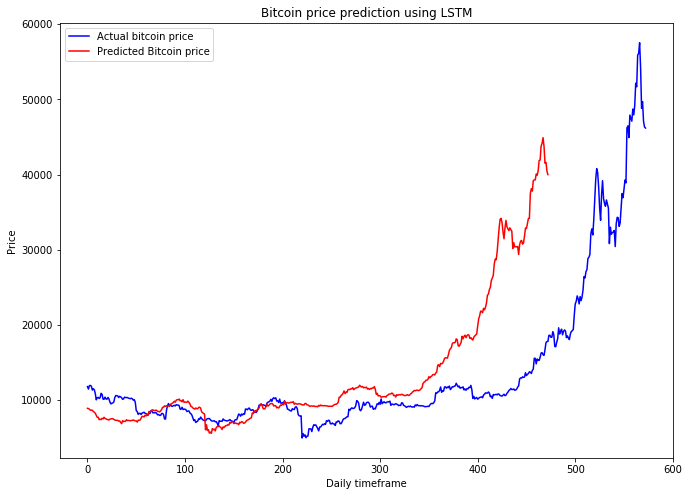

In [496]:
# We now try to visualize our prediction along with the original data in order to see how well it performed!
plt.figure(figsize=(11,8))
#plt.plot(range(required_data.shape[0]),required_data['Close'],label='Trained Price')
plt.plot(original_btc_price,color='blue',label='Actual bitcoin price')
plt.plot(test_predict,color='red',label='Predicted Bitcoin price')
plt.title('Bitcoin price prediction using LSTM')
plt.xlabel('Daily timeframe')
plt.ylabel('Price')
plt.legend()
plt.show()